# Mount Google Drive

In [ ]:
# nb_path =

!pip install pymzml --upgrade #change package name here

from google.colab import drive
drive.mount('/content/drive', force_remount = True)
import os


#Installation things (only run the first time when setting up the notebook)

For the Below, If you don't have these packages installed, Run the following command for each package listed, changing the name of the package each time


In [ ]:
nb_path = ''
!pip install --target=$nb_path pymzml #change package name here



In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
import os
import sys

nb_path = '/content/drive/MyDrive/Colab\ Notebooks'
if nb_path not in sys.path:
  sys.path.insert(5, nb_path)
#os.symlink('/content/notebooks', nb_path)
os.chdir("/content/drive/MyDrive/Colab Notebooks")

#!conda install pymzml #change package name here

In [ ]:
!python -m pip install --upgrade pip


In [ ]:
!pip install numpy #change package name here

In [ ]:
pip install glob2 #change package name here

In [ ]:
!pip install pymzml #change package name here

In [ ]:
!pip install --upgrade pandas #change package name here

In [ ]:
!pip install matplotlib #change package name here

In [ ]:
!pip install --target=$nb_path  numpy

In [ ]:
!pip3 install --target=$nb_path --upgrade peakutils

In [ ]:
import matplotlib.font_manager as fm

# Imports

In [ ]:
pip install scipy


In [ ]:
import pandas as pd
import pymzml
import scipy

In [ ]:
import os

os.chdir("/content/drive/MyDrive/Colab Notebooks")
import openeye as oechem
import numpy as np
import glob
# import scipy
# import scipy#.signal
import peakutils

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn-pastel')
from matplotlib import rc
from matplotlib import font_manager as fm



import math

def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

# fontpropbold = 'DejaVu Sans'
path = '/content/drive/MyDrive/Colab Notebooks/Open_Sans/static/OpenSans/OpenSans-Regular.ttf'
fontprop = fm.FontProperties(fname=path)
fontpropbold = fm.FontProperties(fname='/content/drive/MyDrive/Colab Notebooks/Open_Sans/static/OpenSans/OpenSans-Bold.ttf')

#Definitions >> load first

##Pairing files code

In [ ]:
def PairAndAnalyze(dir = "", beg = ""):
  PairedFiles = []
  mzML_files = glob.glob(dir + '/*.mzML')
  txt_files = glob.glob(dir + '/*.txt')

  for m in mzML_files:
    #print(m)
    base=os.path.basename(m)
    file_name = os.path.splitext(base)[0]
    samp_beg = file_name.find(beg)
    match_sample = (file_name[samp_beg+len(beg):])

    for t in txt_files:
      base_t=os.path.basename(t)
      file_name_t = os.path.splitext(base_t)[0]
      #print(file_name)
      end_t = "_UV_VIS"
      samp_beg_t = file_name_t.find(beg)
      samp_end_t = file_name_t.find(end_t, 1)
      t_sample = (file_name_t[samp_beg_t+len(beg):(samp_end_t)])

      if match_sample != 0 and match_sample == t_sample: #if you need the file that matches
          PairedFiles.append([str(m), str(t), match_sample])
      else:
          continue
  return PairedFiles

##Plot functions

Plot chromatogram: specify sample name and filenames of .mzmL and .txt files

In [ ]:

def PlotChromatogram(sample_name = "", txt_file = "", mzml_file = "", title = "", peak_thres = 0.1, begin_x = 0, abs = "323nm"):


  #peak_thres = 0.05
  mass_deviation = 2

  chrom_df = pd.read_csv(txt_file, sep = '\t', header = 38)
  run = pymzml.run.Reader(mzml_file, skip_chromatogram=False)
  #masses_df = pd.read_csv(csv_file, sep = '\t', header = 0)
  # chromatogram analysis
  if chrom_df['Value (mAU)'].dtype == str or chrom_df['Value (mAU)'].dtype == object:
    chrom_df['Value (mAU)'] = chrom_df['Value (mAU)'].str.replace(",","")

  tempx = []
  tempy = []

  for i, e in enumerate(chrom_df["Time (min)"]):
    if e > begin_x:
      tempx.append(e)
      tempy.append(chrom_df['Value (mAU)'][i])

  x = np.array(tempx)
  y = np.array(tempy)

  y = y.astype(float)
  # base = peakutils.baseline(y)
  # y = y - base #subtract out baseline

  peak_total = sum(y)
  print(max(y))
  if max(y) > 5:
      indexes = peakutils.indexes(y,thres=peak_thres, min_dist=10)
  else:
      indexes = peakutils.indexes(y, thres= 2, thres_abs = True)



  widths = scipy.signal.peak_widths(y, indexes)




  ###################
  plt.figure(figsize = (10,4))
  plt.plot(x,y, color = "grey", linewidth=2)
  ax = plt.gca()

  ax.tick_params(axis='both',
                 which='both',
                 length=0)
  ax.set_facecolor ("white")
  for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
  #print (indexes)

  peak_AUC = {}
  ax.yaxis.set_major_locator(plt.MaxNLocator(3))
  plt.setp(ax.get_yticklabels()[0], visible=True)
  for i, j in enumerate(widths[0]):
      #print(j)
      idx_low = indexes[i]-int(j)
      idx_high = indexes[i]+int(j)
      r = [idx_low, idx_high]
      peak_AUC[indexes[i]] = sum(y[idx_low:idx_high+1])/peak_total*100
     # plt.fill_betweenx([y[idx_low],y[idx_high]],[x[idx_low],x[idx_high]])

  for c,i in enumerate(indexes):
    label = truncate(y[i],2)
    AUC_lab = str(truncate(peak_AUC[i], 2))

    plt.annotate(str(c),
                (x[i], y[i]),
                textcoords = "offset points",
                xytext=(0,8),
                ha='center',
                fontsize = 10,fontproperties=fontpropbold)


  plt.ylim(top= max(y)*2)

  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)

  plt.xlabel("Time(min)", color = "black", weight = 'bold', fontproperties=fontpropbold, fontsize = 15)
  plt.ylabel ("Absorbance Intensity (%s, mAu)" % abs, color = "black",fontproperties=fontpropbold,fontsize = 15)

  plt.title("%s \n Chromatogram" % sample_name, color = "black",fontproperties=fontpropbold,  x=0.5, y=1.1,fontsize = 20)
  plt.savefig(dir + "/Chromatogram_%s.svg" % sample_name, transparent = True, bbox_inches='tight')
  plt.show()
  plt.grid(None)
  plt.close()
  ##############
  # generating MS data lists for next step.
  list_spec = {}

  for entry in run:
      try:
          if isinstance(entry, pymzml.spec.Spectrum):
              #print("Spec found at %s" % x[t])
              MZ = []
              ms_int = []
              time = []

              for mz, intensity in entry.peaks("raw"):

                  MZ.append(truncate(mz,3))
                  ms_int.append(truncate(intensity,2))
                  time.append(float((entry.scan_time)[0]))

              spec_data = pd.DataFrame(list(zip(MZ, ms_int,time)), columns = ["MZ", "Intensity", "Time"])
              list_spec[truncate(entry.scan_time[0], 2)] = spec_data
      except AttributeError:
          continue
  return sample_name, list_spec, indexes, x, peak_AUC


Plot Spectrum

In [ ]:
def PlotSpectrum (spec_time, xmin = 0, xmax = 10, ymax = 0, threshold = 0.3, sample_name = ""):
  spec_time = truncate(spec_time, 2)
  try:
    df = list_spec[spec_time]
  except KeyError:
    try:
      df = list_spec[spec_time - 0.1]
    except:
      df = pd.DataFrame(columns = ['MZ', 'Intensity'])
      pass

  x = np.asarray(df['MZ'])
  y = np.asarray(df['Intensity'])
  y_lab = np.argwhere(y > np.amax(y)*threshold) # selects points which are this fraction of the max value in the spectrum to label


############## Plotting ##########################

  plt.figure(figsize=(10,4))
  #ax = fig.add_axes([0,0,1,1])
  plt.bar(x,y,width = 2, color = "grey")
  #plt.tight_layout()

  ax1 = plt.gca()
  ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.setp(ax1.get_yticklabels()[0], visible=False)
  ax1.tick_params(axis='both',
                  which='both',
                  length=0)
  ax1.set_facecolor ("white")
  for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.5)
  #ax1.autoscale()

  masses = []
  for i in y_lab:
    label = str(truncate(float(x[i]),1))
    masses.append(float(label))
    plt.annotate(label,
                (x[i], y[i]),
                textcoords = "offset points",
                xytext=(0,5), #distance away from point in (x,y) direction
                ha='left',
                rotation = 55,
                fontsize = 10, fontproperties=fontpropbold)

  plt.xlim(xmin,xmax)
  ylimit = max(y)*2
  if ymax > 0:
    plt.ylim(0,ymax)
  else:
      plt.ylim(0,ylimit)
  plt.xlabel("m/z", color = "black", weight = 'bold',fontproperties=fontpropbold,fontsize = 15)
  plt.ylabel ("Intensity (mAu)", color = "black", weight = 'bold',fontproperties=fontpropbold,fontsize = 15)
  plt.title("%s \n Mass Spectrum" % sample_name, weight= 'bold',fontproperties=fontpropbold, x=0.5, y=1.1,fontsize = 20)
  #plt.tight_layout()
  plt.savefig(dir + "/%s.svg" % sample_name, transparent = True, bbox_inches='tight')
  plt.show()
  plt.close()
  return masses




#plot multiple files


In [ ]:
#find all the mzmL files in folder
dir = '/content/drive/MyDrive/Colab Notebooks/20240506'
beg = ""
files = PairAndAnalyze(dir = dir,
                       beg = beg)
print(files)

In [ ]:
for i, f in enumerate(files):
  sample_name,list_spec, indexes, x, AUC = PlotChromatogram(sample_name = "%s" % str(f[2]),
                                                       txt_file = f[1],
                                                       mzml_file = f[0],
                                                       title = "",
                                                       peak_thres = .3,
                                                       begin_x = 1,
                                                       abs = "280 nm")

  df_curr = pd.DataFrame(columns = ['Peak', 'Ret.Time(min)', 'PeakAUC','RelPeakAUC', 'Major_m/z'], dtype = 'object')
  sum_AUC = 0
  for c,n in enumerate(indexes):
    sum_AUC +=  truncate(AUC[n], 2)

  for c, n in enumerate(indexes): #for each peak
    if x[n] > 0:
      try:
        df_curr.at[c-1 , 'Peak'] = c
        df_curr.at[c-1 , 'Ret.Time(min)'] = truncate(x[n], 2)
        df_curr.at[c-1 , 'PeakAUC'] = truncate(AUC[n], 2)
        df_curr.at[c-1 , 'RelPeakAUC'] = truncate(AUC[n]/ sum_AUC * 100, 2)
        mz = PlotSpectrum(spec_time = truncate(x[n],2) + 0.00,  #+ time offset value
                    xmin = 200,
                    xmax = 1500,
                    ymax = 0,
                    threshold = 0.2, # what % of the max peak you want the labels on. if labels are too crowded,increase this. If not enough, decrease
                    sample_name= sample_name + " Peak %s" % str(c))
        df_curr.at[c-1 , 'Major_m/z'] = mz

        df_curr= df_curr.sort_values(by = 'RelPeakAUC')
      except:
        continue

  print (df_curr)
  df_curr.to_csv (dir + '/Data for %s.csv' % sample_name, index = False)
  #dfi.export(df_curr, "Data for %s" % sample_name)


#ForMALDI


In [ ]:
run = pymzml.run.Reader('/content/drive/MyDrive/Colab Notebooks/A11.mzML', skip_chromatogram=True) # put in directory link to mzml file instead of mzml_file
dir = "A11" #insert the file name you want output as
for entry in run:
    if isinstance(entry, pymzml.spec.Spectrum):
      #print("spec found at %s" % x[t])
      MZ = []
      ms_int = []

      for mz, intensity in entry.peaks("centroided"):
          MZ.append(mz)
          ms_int.append(intensity)
      df = pd.DataFrame(list(zip(MZ, ms_int)), columns = ["MZ", "Intensity"])
      specpeak_max = df.nlargest(20,"Intensity")
      specpeak_max = specpeak_max.round(2)


      x = np.asarray(df['MZ'])
      y = np.asarray(df['Intensity'])
      y_lab = np.argwhere(y > np.amax(y)*0.5) # selects points which are this fraction of the max value in the spectrum to label


    ############## Plotting ##########################


      plt.figure(figsize=(10,4))
      #ax = fig.add_axes([0,0,1,1])
      plt.bar(x,y,width = 2, color = "grey")
      #plt.tight_layout()

      ax1 = plt.gca()
      ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
      plt.yticks(fontsize=20)
      plt.xticks(fontsize=20)
      plt.setp(ax1.get_yticklabels()[0], visible=False)
      ax1.tick_params(axis='both',
                      which='both',
                      length=0)
      ax1.set_facecolor ("white")
      for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(2.5)
      #ax1.autoscale()

      masses = []
      for i in y_lab:
        label = str(truncate(float(x[i]),1))
        masses.append(label)
        plt.annotate(label,
                    (x[i], y[i]),
                    textcoords = "offset points",
                    xytext=(0,8), #distance away from point in (x,y) direction
                    ha='center',
                    rotation = 90,
                    fontsize = 7)
      #plt.xlim(xmin,xmax)
      ylimit = max(y)*2
      plt.ylim(0,ylimit)
      plt.xlabel("m/z", color = "black", weight = 'bold',fontproperties=fontpropbold,fontsize = 15)
      plt.ylabel ("Intensity (mAu)", color = "black", weight = 'bold',fontproperties=fontpropbold,fontsize = 15)
      plt.title("Mass Spectrum"+ "\n" + "%s" % dir, weight= 'bold',fontproperties=fontpropbold, x=0.5, y=1.1,fontsize = 20)
      #plt.tight_layout()
      plt.savefig( "/content/drive/MyDrive/Colab Notebooks/%s.pdf" % dir, transparent = True, bbox_inches='tight')
      plt.show()
      plt.close()


In [ ]:
def PlotChromatogramOnly(sample_name = "", txt_file = "",title = "", peak_thres = 0.1, begin_x = 0, abs = "323nm"):
  plt.rcParams['axes.linewidth'] = 1

  chrom_df = pd.read_csv(txt_file, sep = ',', header = 22)
  pd.to_numeric(chrom_df['R.Time (min)'])
  print(chrom_df)
  # chromatogram analysis
  if chrom_df['Intensity'].dtype == str or chrom_df['Intensity'].dtype == object:
    chrom_df['Intensity'] = chrom_df['Intensity'].str.replace(",","")

  tempx = []
  tempy = []

  for i, e in enumerate(chrom_df["R.Time (min)"]):
    if e > begin_x:
      tempx.append(e)
      tempy.append(chrom_df['R.Time (min)'][i])

  x = np.array(tempx)
  y = np.array(tempy)

  y = y.astype(float)
  # base = peakutils.baseline(y)
  # y = y - base #subtract out baseline

  peak_total = sum(y)
  if max(y) > 5:
      indexes = peakutils.indexes(y,thres=peak_thres, min_dist=10)
  else:
      indexes = peakutils.indexes(y, thres= 2, thres_abs = True)



  widths = scipy.signal.peak_widths(y, indexes)




  ###################
  plt.figure()
  plt.plot(x,y, color = "grey")

  ax = plt.axes()
  ax.set_facecolor ("white")
  ax.spines.set_linewidth(3)

  ax.spines['bottom'].set_color('grey')
  ax.spines['top'].set_color('grey')
  ax.spines['right'].set_color('grey')
  ax.spines['left'].set_color('grey')
  #print (indexes)

  peak_AUC = {}

  for i, j in enumerate(widths[0]):
      #print(j)
      idx_low = indexes[i]-int(j)
      idx_high = indexes[i]+int(j)
      r = [idx_low, idx_high]
      peak_AUC[indexes[i]] = sum(y[idx_low:idx_high+1])/peak_total*100
     # plt.fill_betweenx([y[idx_low],y[idx_high]],[x[idx_low],x[idx_high]])

  for c,i in enumerate(indexes):
    label = truncate(y[i],2)
    AUC_lab = str(truncate(peak_AUC[i], 2))

    plt.annotate(str(c),
                (x[i], y[i]),
                textcoords = "offset points",
                xytext=(0,5),
                ha='right',
                fontsize = 6.5, weight = 'bold')


  plt.xlabel("Time(min)", color = "black", weight = 'bold')
  plt.ylabel ("Absorbance Intensity (mAu) \n %s" % abs, color = "black", weight = 'bold')
  #plt.yscale(scale)
  #plt.hlines(widths[1:], color="C3")
  #plt.xlim(begin_x,12)
  plt.ylim(top= max(y)*2)
  #plt.ylim(top = 3000)
  plt.title(title + "\n %s" % sample_name, color = "black")
  plt.savefig(dir + "/Chromatogram_%s.png" % sample_name, transparent = True)
  plt.show()
  plt.grid(None)
  plt.close()

#Plot chromatogram only
make .csv look like this
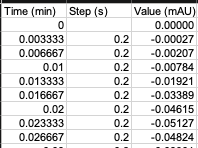

In [ ]:
dir = '/content/drive/MyDrive/Colab Notebooks/01 Jan 2024/'
beg =  ""


sample_name,list_spec, indexes, x, AUC = PlotChromatogram(sample_name = "Pdt",
                                                      txt_file = dir+'Az-HDNA crude 1_UV_VIS_1.txt',
                                                      title = "Product",
                                                      peak_thres = .3,
                                                      begin_x = .5,
                                                      abs = "260nm")


#Plotting TIC

In [ ]:

def PlotTIC(sample_name = "", mzml_file = "", title = "", peak_thres = 0.1):

  mass_deviation = 2

  run = pymzml.run.Reader(mzml_file, skip_chromatogram=False)
  # chromatogram analysis
  chrom_df = pd.DataFrame(columns = ['Time', 'Intensity'])
  time = []
  intensity = []
  for entry in run:
     if isinstance(entry, pymzml.spec.Chromatogram):
         for t, i in entry.peaks():
             time.append( truncate(float(t), 2))
             intensity.append( truncate(float(i), 2))
  x = np.array(time)
  y = np.array(intensity)
  y = y.astype(float)
  #base = peakutils.baseline(y)
  #y = y - base #subtract out baseline

  peak_total = sum(y)
  if max(y) > 150:
    indexes = peakutils.indexes(y,  min_dist = 100)
  else:
    indexes = peakutils.indexes(y, peak_thres, thres_abs = True, min_dist = 5)

  widths = scipy.signal.peak_widths(y, indexes)




  ###################
  plt.figure()
  plt.plot(x,y)

  ax = plt.axes()
  ax.set_facecolor ("white")
  ax.spines['bottom'].set_color('grey')
  ax.spines['top'].set_color('grey')
  ax.spines['right'].set_color('grey')
  ax.spines['left'].set_color('grey')
  #print (indexes)

  peak_AUC = {}

  for i, j in enumerate(widths[0]):
      #print(j)
      idx_low = indexes[i]-int(j)
      idx_high = indexes[i]+int(j)
      r = [idx_low, idx_high]
      peak_AUC[indexes[i]] = sum(y[idx_low:idx_high+1])/peak_total*100
     # plt.fill_betweenx([y[idx_low],y[idx_high]],[x[idx_low],x[idx_high]])

  for c,i in enumerate(indexes):
    label = str(truncate(x[i],2))
    AUC_lab = str(truncate(peak_AUC[i], 2))
    plt.annotate(str(c),
                 (x[i], y[i]),
                 textcoords = "offset points",
                 xytext=(0,5),
                 ha='center',
                 fontsize = 7)


  plt.xlabel("Time(min)", color = "black")
  plt.ylabel ("Intensity", color = "black")
  #plt.yscale(scale)
  #plt.hlines(widths[1:], color="C3")
  #plt.xlim(0,12)
  plt.ylim(0, max(y)*2)
  #plt.ylim(1000000, 50000000)
  plt.title(title + "\n %s" % sample_name, color = "black")
  plt.savefig(dir + "/TIC %s.svg" % sample_name, transparent = True)
  plt.show()
  plt.grid(None)
  plt.close()
  ##############
  # generating MS data lists for next step.
  list_spec = {}

  for entry in run:
      try:
          if isinstance(entry, pymzml.spec.Spectrum):
              #print("Spec found at %s" % x[t])
              MZ = []
              ms_int = []
              time = []

              for mz, intensity in entry.peaks("raw"):

                  MZ.append(truncate(mz,3))
                  ms_int.append(truncate(intensity,2))
                  time.append(float((entry.scan_time)[0]))

              spec_data = pd.DataFrame(list(zip(MZ, ms_int,time)), columns = ["MZ", "Intensity", "Time"])
              list_spec[truncate(entry.scan_time[0], 2)] = spec_data
      except AttributeError:
          continue
  return sample_name, list_spec, indexes, x, peak_AUC


In [ ]:
#find all the mzmL files in folder
dir = '/content/drive/MyDrive/Colab Notebooks/patrick'
beg =  "20210824"
files = PairAndAnalyze(dir = dir,
                       beg = beg)
print(files)



#for i, f in enumerate(files):
sample_name,list_spec, indexes, x, AUC = PlotTIC(sample_name ="", #"%s " % str(f[2]),
                                                      mzml_file = "/content/drive/MyDrive/Colab Notebooks/patrick/20210824 PRF pc1 220-213_19.mzML", # f[0],
                                                      title = " 20210824 PC1 220-213 \n TIC",
                                                      peak_thres = 100)

df_curr = pd.DataFrame(columns = ['Peak', 'Ret. Time (min)', 'Peak AUC', 'Major m/z'], dtype = 'object')

for c, n in enumerate(indexes): #for each peak
  if x[n] > 0:

    df_curr.at[c-1 , 'Peak'] = c
    df_curr.at[c-1 , 'Ret. Time (min)'] = truncate(x[n], 2)
    df_curr.at[c-1 , 'Peak AUC'] = truncate(AUC[n], 2)
    mz = PlotSpectrum(spec_time = truncate(x[n],2) + 0.20,  #+ time offset value
                  xmin = 160,
                  xmax = 1500,
                  threshold = 0.1, # what % of the max peak you want the labels on. if labels are too crowded,increase this. If not enough, decrease
                  sample_name= "TIC Spectrum" + sample_name + " Peak %s" % str(c))
    df_curr.at[c-1 , 'Major m/z'] = mz
print (df_curr)
df_curr.to_csv (dir + '/TIC Data for %s.csv' % sample_name, index = False)
#dfi.export(df_curr, "Data for %s" % sample_name)


#Plot a single MS trace from a .txt file


In [ ]:
# Plotting MS from .txt
os.chdir('/content/drive/MyDrive/Colab Notebooks')
sample_name = "20230615_PC1-gly-fam"
specdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/20200625_43202.txt', delimiter = "\t", header = 31)
specdata['Mass (m/z)'] = specdata['Mass (m/z)'].str.replace(',','')
specdata['Value (counts)'] = specdata['Value (counts)'].str.replace(',','')

threshold = 0.5
print(specdata)

x = np.asarray(specdata['Mass (m/z)'], dtype= float)

y = np.asarray(specdata['Value (counts)'], dtype = float)
print(np.amax(y))

y_lab = np.argwhere(y > (np.amax(y) * threshold)) # selects points which are this fraction of the max value in the spectrum to label


plt.figure(figsize=(10,4))
#ax = fig.add_axes([0,0,1,1])
plt.bar(x,y,width = 2, color = "grey")
#plt.tight_layout()

ax1 = plt.gca()
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.setp(ax1.get_yticklabels()[0], visible=False)
ax1.tick_params(axis='both',
                which='both',
                length=0)
ax1.set_facecolor ("white")
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2.5)
#ax1.autoscale()

masses = []
for i in y_lab:
  label = str(truncate(float(x[i]),1))
  masses.append(label)
  plt.annotate(label,
              (x[i], y[i]),
              textcoords = "offset points",
              xytext=(0,8), #distance away from point in (x,y) direction
              ha='center',
              rotation = 90,
              fontsize = 7)
plt.xlim(xmin,xmax)
ylimit = max(y)*2
if ymax > 0:
  plt.ylim(0,ymax)
else:
    plt.ylim(0,ylimit)
plt.xlabel("m/z", color = "black", weight = 'bold',fontproperties=fontpropbold,fontsize = 15)
plt.ylabel ("Intensity (Au)", color = "black", weight = 'bold',fontproperties=fontpropbold,fontsize = 15)
plt.title("Mass Spectrum"+ "\n" + "%s" % sample_name, weight= 'bold',fontproperties=fontpropbold, x=0.5, y=1.1,fontsize = 20)

plt.savefig("/content/drive/MyDrive/Colab Notebooks/%s.svg" % sample_name, transparent = True)
plt.show()
plt.close()



In [ ]:
##csv editing
df_old = pd.read_csv('export.csv')

# display(df_old)
df_new = df_old
df_new = df_new.drop(df_new.filter(regex='Suffix').columns, axis=1)
df_new = df_new.drop(df_new.filter(regex='Title').columns, axis=1)

display(df_new)

for line, entry in df_new.iterrows():
  if entry['Partner First Name'] != np.NaN:
     df_new.loc[len(df_new)] = 'First Name':entry['Partner First Name']},
      {'Last Name':entry['Partner Last Name'] },
      {'Party':str(entry['Last Name'] + entry['Partner Last Name'])}],
      ignore_index=True)
display(df_new)